# Import Libraries

In [1]:
# Import used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
# Import used datasets
raw_details_df = pd.read_csv('https://raw.githubusercontent.com/carneiroRomulo/SeazoneChallenge/main/datasets/details.csv')
raw_priceav_df = pd.read_csv('https://raw.githubusercontent.com/carneiroRomulo/SeazoneChallenge/main/datasets/priceav.csv')

# Data Cleaning


In [3]:
# View the structure of the 'details.csv' dataset
raw_details_df.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [4]:
# Removes features not needed for analysis
raw_details_df = raw_details_df.drop(columns=['Unnamed: 0'])

In [5]:
# Checks for relevant NaN values in the 'details.csv' dataset
raw_details_df.isna().sum()

airbnb_listing_id         0
suburb                    0
ad_name                   0
number_of_bedrooms      183
number_of_bathrooms       1
star_rating            2121
is_superhost              0
number_of_reviews         7
dtype: int64

In [6]:
raw_details_df.shape

(4691, 8)

In [7]:
# Droping data that has insignificant amout of missing values
df1_details = raw_details_df.dropna(subset=['number_of_bathrooms', 'number_of_reviews','number_of_bedrooms'])

In [8]:
# Checking if there is an ad with star_rating bigger than zero even if the number_of_reviews is zero
df1_details.star_rating[df1_details.number_of_reviews == 0].sort_values(ascending=False)

4517    0.0
2104    0.0
2035    0.0
1741    0.0
1474    0.0
       ... 
4674    NaN
4677    NaN
4685    NaN
4686    NaN
4687    NaN
Name: star_rating, Length: 1113, dtype: float64

In [9]:
df1_details.star_rating.describe()

count    2450.000000
mean        4.831837
std         0.435143
min         0.000000
25%         4.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: star_rating, dtype: float64

In [10]:
# Completing the missing values that are too important to be eliminated, filling them with the median
df2_details = df1_details.fillna(df1_details['star_rating'].median())

In [11]:
df2_details['number_of_bedrooms'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6., 10.])

In [12]:
df2_details['number_of_bathrooms'].unique()

array([2., 1., 4., 3., 5., 0., 6., 8.])

In [13]:
# Checking for possibles outliers
df2_details[df2_details.number_of_bedrooms>3].shape

(79, 8)

In [14]:
df2_details[df2_details.number_of_bedrooms>3].shape

(79, 8)

In [15]:
# Removing outliers
df2_details = df2_details[(df2_details.number_of_bedrooms<4) & (df2_details.number_of_bathrooms<4)]

In [16]:
# View the structure of the 'priceav.csv' dataset
raw_priceav_df.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


In [17]:
raw_priceav_df.dtypes

Unnamed: 0             int64
Unnamed: 0.1           int64
airbnb_listing_id      int64
booked_on             object
date                  object
price_string         float64
occupied               int64
dtype: object

In [18]:
# Checks for relevant NaN values in the 'priceav.csv' dataset
raw_priceav_df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
airbnb_listing_id    0
booked_on            0
date                 0
price_string         0
occupied             0
dtype: int64

In [19]:
raw_priceav_df['booked_on'].unique()

array(['blank', '2021-01-01 00:00:00', '2021-02-10 00:00:00',
       '2021-03-15 00:00:00', '2020-04-01 00:00:00',
       '2020-10-16 00:00:00', '2020-09-03 00:00:00',
       '2020-11-10 00:00:00', '2020-12-31 00:00:00',
       '2021-01-20 00:00:00', '2020-09-16 00:00:00',
       '2021-03-17 00:00:00', '2021-01-07 00:00:00',
       '2021-01-09 00:00:00', '2021-01-10 00:00:00',
       '2021-01-11 00:00:00', '2021-01-12 00:00:00',
       '2021-01-13 00:00:00', '2021-01-16 00:00:00',
       '2021-01-17 00:00:00', '2021-01-19 00:00:00',
       '2021-01-21 00:00:00', '2021-01-22 00:00:00',
       '2021-01-23 00:00:00', '2021-01-24 00:00:00',
       '2021-01-27 00:00:00', '2021-01-30 00:00:00',
       '2021-02-01 00:00:00', '2021-02-03 00:00:00',
       '2021-02-04 00:00:00', '2021-02-05 00:00:00',
       '2021-02-06 00:00:00', '2021-02-07 00:00:00',
       '2021-02-09 00:00:00', '2021-02-12 00:00:00',
       '2021-02-14 00:00:00', '2021-02-15 00:00:00',
       '2021-02-17 00:00:00', '2021-0

In [20]:
# Ignoring the time value in 'booked_on'
df1_price = raw_priceav_df
df1_price['booked_on'] = df1_price['booked_on'].apply(lambda x: x.split(' ')[0])
df1_price['booked_on'].unique()

array(['blank', '2021-01-01', '2021-02-10', '2021-03-15', '2020-04-01',
       '2020-10-16', '2020-09-03', '2020-11-10', '2020-12-31',
       '2021-01-20', '2020-09-16', '2021-03-17', '2021-01-07',
       '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
       '2021-01-13', '2021-01-16', '2021-01-17', '2021-01-19',
       '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
       '2021-01-27', '2021-01-30', '2021-02-01', '2021-02-03',
       '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
       '2021-02-09', '2021-02-12', '2021-02-14', '2021-02-15',
       '2021-02-17', '2021-02-19', '2021-02-21', '2021-02-22',
       '2021-02-23', '2021-02-25', '2021-02-27', '2021-02-28',
       '2021-03-01', '2021-03-05', '2021-03-06', '2021-03-09',
       '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-18',
       '2021-03-19', '2021-03-20', '2021-03-22', '2021-03-26',
       '2021-03-27', '2021-03-28', '2020-10-23', '2020-03-29',
       '2020-12-27', '2020-12-15', '2020-12-30

In [21]:
df1_price.shape

(354520, 7)

# 1. Sort suburb in ascending order of number of listings

In [22]:
# Removes features not needed for analysis
df3_details = df2_details.drop(columns=['ad_name'])

In [23]:
# Sorts dataset in ascending order according to number of listings in each suburb
df3_details = df3_details.groupby('suburb', as_index=False).airbnb_listing_id.count()
df3_details.sort_values(['airbnb_listing_id'], inplace=True)
df3_details

,suburb,airbnb_listing_id
1,Centro,238
4,Lagoa da Conceição,258
3,Jurerê,498
0,Canasvieiras,1125
2,Ingleses,2281


Text(0, 0.5, 'Number of Listings')

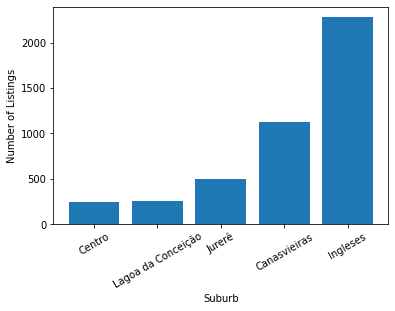

In [24]:
# Showing with graph

plt.bar(df3_details.suburb, df3_details.airbnb_listing_id)
plt.xlabel('Suburb')
plt.xticks(rotation=30)
plt.ylabel('Number of Listings')

# 2. Sort the suburb in ascending order of average listing earnings.

In [25]:
# Removes features not needed for analysis
df2_price = df1_price.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df2_price.head()

,airbnb_listing_id,booked_on,date,price_string,occupied
0,40201349,blank,2020-11-15,250.0,0
1,40201349,blank,2020-11-26,250.0,0
2,40201349,blank,2020-11-27,250.0,0
3,40201349,blank,2020-12-10,250.0,0
4,40201349,blank,2021-02-01,250.0,0


In [26]:
# Selects only occupied IDs
df3_price = df2_price.get(df2_price['occupied']==1)
df3_price.head()

,airbnb_listing_id,booked_on,date,price_string,occupied
12,40206270,2021-01-01,2021-01-01,380.0,1
13,40206270,2021-01-01,2021-01-02,380.0,1
52,40206270,2021-02-10,2021-02-10,195.0,1
53,40206270,2021-02-10,2021-02-11,350.0,1
54,40206270,2021-02-10,2021-02-12,350.0,1


In [27]:
# Combine datasets
df_merged = pd.merge(df2_details, df3_price, how='inner')
df_merged.rename(columns={'price_string':'billing'}, inplace=True)

In [28]:
# Calculates average ad billing
df2_merged = df_merged.groupby('suburb', as_index=False).billing.mean().round(2)
df2_merged.sort_values(['billing'], inplace=True)

Text(0, 0.5, 'Billing')

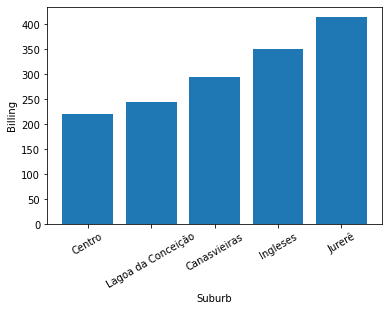

In [29]:
plt.bar(df2_merged.suburb, df2_merged.billing)
plt.xlabel('Suburb')
plt.xticks(rotation=30)
plt.ylabel('Billing')

# 3. Is there any correlation between the characteristics of an ad and its billing? That are? Explain.

In [30]:
'''import statsmodels.api as sm

def calc_vif(df):
  vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
  x_var_names = df.columns

  for i in range(0, x_var_names.shape[0]):
    y = df[x_var_names[i]]
    x = df(x_var_names.drop([x_var_names[i]]))
    r_squared = sm.OLS(y,x).fit().rsquared
    vif = round(1/(1-r_squared),2)
    vif_df.loc[i] = [x_var_names[i], vif]
  
  return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)'''

"import statsmodels.api as sm\n\ndef calc_vif(df):\n  vif_df = pd.DataFrame(columns = ['Var', 'Vif'])\n  x_var_names = df.columns\n\n  for i in range(0, x_var_names.shape[0]):\n    y = df[x_var_names[i]]\n    x = df(x_var_names.drop([x_var_names[i]]))\n    r_squared = sm.OLS(y,x).fit().rsquared\n    vif = round(1/(1-r_squared),2)\n    vif_df.loc[i] = [x_var_names[i], vif]\n  \n  return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)"

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

X = encoder.fit_transform(df_merged.suburb.values.reshape(-1,1)).toarray()
X

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [32]:
suburb_encoded = pd.DataFrame(X, columns = ['A', 'B', 'C', 'D', 'E'])

In [51]:
df_analysis = df_merged.join(suburb_encoded, lsuffix='_caller', rsuffix='_other')
df_analysis = df_analysis.drop(columns=['suburb', 'ad_name', 'booked_on', 'date', 'occupied'])

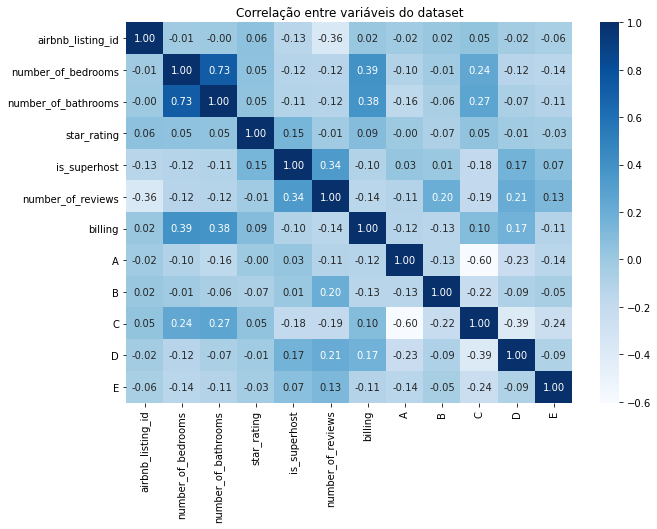

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(df_analysis.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [35]:
 relation_billing_suburb = df_merged.groupby('suburb', as_index=False).billing.sum().round(2)
 relation_billing_bedrooms = df_merged.groupby('number_of_bedrooms', as_index=False).billing.sum().round(2)
 relation_billing_bathrooms = df_merged.groupby('number_of_bathrooms', as_index=False).billing.sum().round(2)
 relation_billing_rating = df_merged.groupby('star_rating', as_index=False).billing.sum().round(2)
 relation_billing_is_superhost = df_merged.groupby('is_superhost', as_index=False).billing.sum().round(2)

Text(0.5, 1.0, 'Relation Bathrooms | Billing')

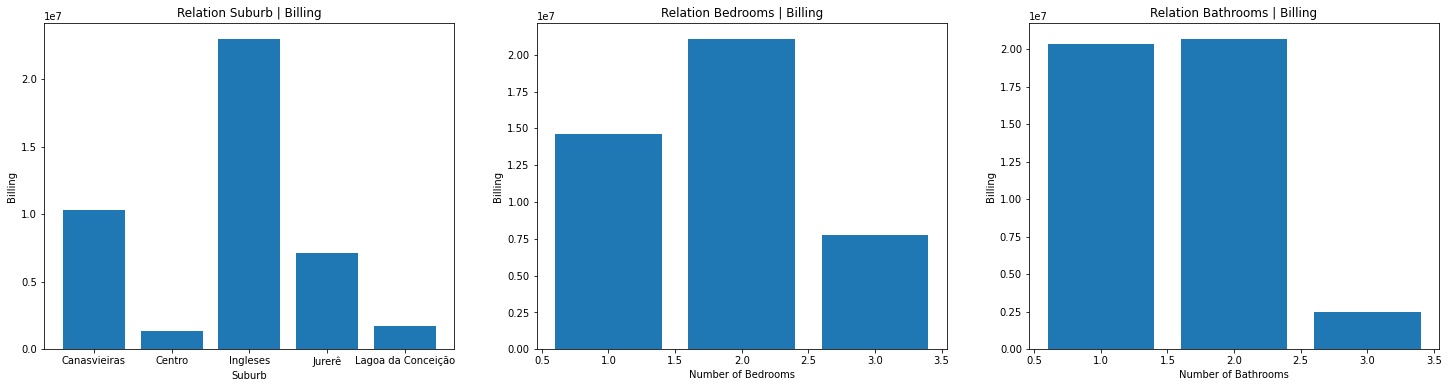

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))
axes[0].bar(relation_billing_suburb.suburb, relation_billing_suburb.billing)
axes[0].set_xlabel('Suburb')
axes[0].set_ylabel('Billing')
axes[0].set_title('Relation Suburb | Billing')

axes[1].bar(relation_billing_bedrooms.number_of_bedrooms, relation_billing_bedrooms.billing)
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Billing')
axes[1].set_title('Relation Bedrooms | Billing')

axes[2].bar(relation_billing_bathrooms.number_of_bathrooms, relation_billing_bathrooms.billing)
axes[2].set_xlabel('Number of Bathrooms')
axes[2].set_ylabel('Billing')
axes[2].set_title('Relation Bathrooms | Billing')

Text(0.5, 1.0, 'Relation Superhost | Billing')

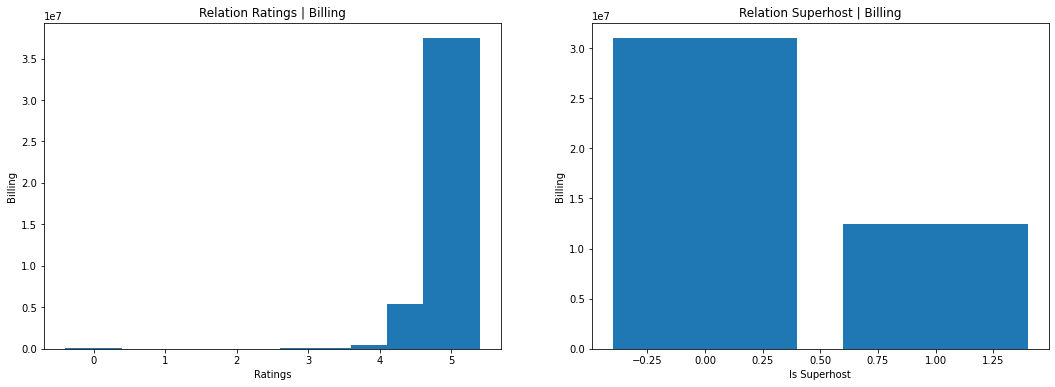

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].bar(relation_billing_rating.star_rating, relation_billing_rating.billing)
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Billing')
axes[0].set_title('Relation Ratings | Billing')

axes[1].bar(relation_billing_is_superhost.is_superhost, relation_billing_is_superhost.billing)
axes[1].set_xlabel('Is Superhost')
axes[1].set_ylabel('Billing')
axes[1].set_title('Relation Superhost | Billing')

# 4. What is the average advance of reservations? Is this number higher or lower for weekends?

In [38]:
# Get the weekday starting from Monday with index = 0 
df5_price = df3_price.copy()

df5_price['booked_on'] = pd.to_datetime(df5_price['booked_on'])
df5_price['date'] = pd.to_datetime(df5_price['date'])

df5_price['days'] = df5_price['date'].dt.weekday
df5_price['months'] = df5_price['date'].dt.month_name()
df5_price

,airbnb_listing_id,booked_on,date,price_string,occupied,days,months
12,40206270,2021-01-01,2021-01-01,380.0,1,4,January
13,40206270,2021-01-01,2021-01-02,380.0,1,5,January
52,40206270,2021-02-10,2021-02-10,195.0,1,2,February
53,40206270,2021-02-10,2021-02-11,350.0,1,3,February
54,40206270,2021-02-10,2021-02-12,350.0,1,4,February
...,...,...,...,...,...,...,...
354508,40199361,2020-09-16,2021-03-19,250.0,1,4,March
354514,40199361,2020-09-14,2021-03-25,250.0,1,3,March
354517,40199361,2020-09-14,2021-03-28,250.0,1,6,March
354518,40199361,2020-09-14,2021-03-29,250.0,1,0,March


In [39]:
# Getting advance of reservations in days
df6_price = df5_price
df6_price['advance_booking'] = (df5_price['date'] - df5_price['booked_on']).dt.days
df6_price

,airbnb_listing_id,booked_on,date,price_string,occupied,days,months,advance_booking
12,40206270,2021-01-01,2021-01-01,380.0,1,4,January,0
13,40206270,2021-01-01,2021-01-02,380.0,1,5,January,1
52,40206270,2021-02-10,2021-02-10,195.0,1,2,February,0
53,40206270,2021-02-10,2021-02-11,350.0,1,3,February,1
54,40206270,2021-02-10,2021-02-12,350.0,1,4,February,2
...,...,...,...,...,...,...,...,...
354508,40199361,2020-09-16,2021-03-19,250.0,1,4,March,184
354514,40199361,2020-09-14,2021-03-25,250.0,1,3,March,192
354517,40199361,2020-09-14,2021-03-28,250.0,1,6,March,195
354518,40199361,2020-09-14,2021-03-29,250.0,1,0,March,196


In [40]:
# Removing outliers
df7_price = df6_price[df6_price.advance_booking < 36]
df7_price['advance_booking'].shape

(100692,)

In [41]:
# advance_booking average
df7_price['advance_booking'].mean()

8.193997537043657

Text(0.5, 1.0, 'Advance booking')

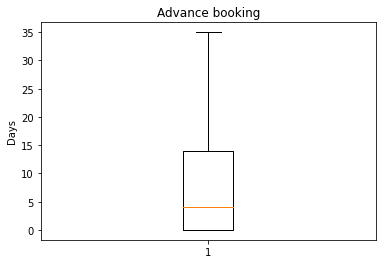

In [42]:
plt.boxplot(df7_price.advance_booking)
plt.ylabel('Days')
plt.title('Advance booking')

In [43]:
# Average reservation per weekday
df8_price = df7_price.groupby('days', as_index=False).advance_booking.mean().round(2)
df8_price = df8_price.sort_values(['days'])
df8_price

,days,advance_booking
0,0,8.11
1,1,7.66
2,2,7.97
3,3,8.25
4,4,8.37
5,5,8.35
6,6,8.58


Text(0.5, 1.0, 'Advance booking')

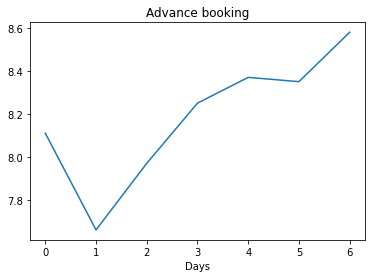

In [44]:
plt.plot(df8_price.days, df8_price.advance_booking)
plt.xlabel('Days')
plt.title('Advance booking')

## **CONCLUSÃO:** Desconsiderando os outliers, houve uma antecedência média de 8.19 dias nas reservas e esse número foi maior no final de semana

# Bonus Analysis

## For when properties were rented most often

In [45]:
# Checking the included months
df7_price['months'].unique()

array(['January', 'February', 'March', 'December', 'November'],
      dtype=object)

In [46]:
# Grouping days and months by frequency
df_days = df7_price.groupby('days', as_index=False).days.count()
df_months = df7_price.groupby('months', as_index=False).months.count()

In [47]:
days = [
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday'
]

months = [
          'Jan',
          'Feb',
          'Marc',
          'Nov',
          'Dec'
]

Text(0.5, 1.0, 'Frequency of rented ads during the year')

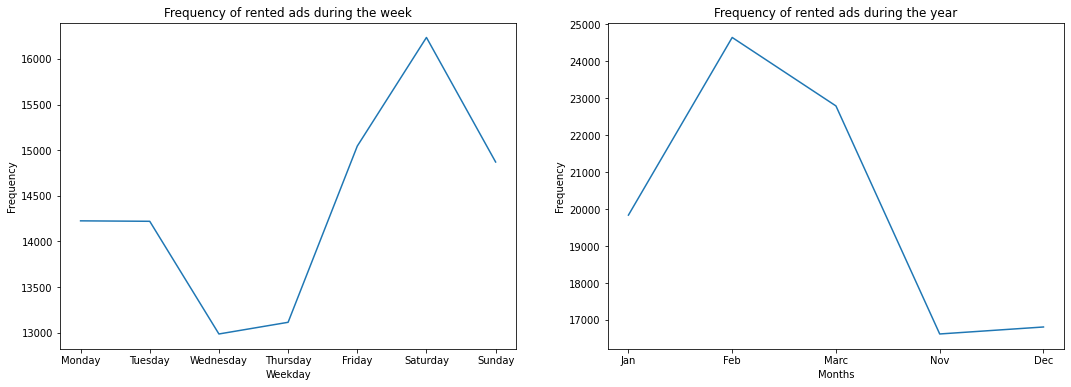

In [48]:
# Ploting graphs for analysis

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].plot(days, df_days)
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of rented ads during the week')

axes[1].plot(months, df_months)
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of rented ads during the year')

## **CONCLUSÃO:** Como pode ser visualizado nos gráficos a cima, os alugueis dos imoveis anunciados estão focados nos finais de semana e no primeiro trimestre do ano, correspondente ao verão